# 06 Spotify Data Regression Analysis 

## 01 Importing Libraries and Data 

In [2]:
import pandas as pd 
import numpy as np 
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression 
from sklearn.metrics import mean_squared_error, r2_score
import os 

In [3]:
%matplotlib inline 

In [4]:
path = '/Users/brookecoffey/Desktop/DataAnalyticsTy/Achievement 6 /Spotify Project'

In [5]:
df = pd.read_pickle(os.path.join(path, '01 Data', '02 Prepared Data', 'df_6.pkl'))

## 02 Data Cleaning 
### Take a subset of songs that were skipped 

In [6]:
df['skipped_x'].value_counts()

not skipped    74945
skipped        60730
other          36441
Name: skipped_x, dtype: int64

In [7]:
df_sub = df[df['skipped_x'] == 'skipped'].reset_index()

In [8]:
df_sub = df_sub[df_sub['count_y'] < 800].reset_index()

In [9]:
df_sub.shape

(60511, 30)

In [10]:
pd.set_option('display.max_columns', 1000)

In [11]:
df_sub

,level_0,index,ts,platform,ms_played,conn_country,master_metadata_track_name,master_metadata_album_artist_name,master_metadata_album_album_name,spotify_track_uri,episode_name,episode_show_name,spotify_episode_uri,reason_start,reason_end,shuffle,skipped_x,offline,latitude,longitude,region,minutes_seconds,year,month,day_of_week,hour_of_day,skipped_ratio,skip_prob,count_y,listening_frequency
0,0,1,2012-07-17 22:26:20,"iOS 5.1.1 (iPod4,1)",25727,US,Jump (feat. Nelly Furtado),Flo Rida,R.O.O.T.S. (Route of Overcoming the Struggle),spotify:track:4uGucgzv0ydi35DgAlsTQ4,NaN,NaN,NaN,unknown,fwdbtn,False,skipped,False,40.1678,-80.2591,Pennsylvania,00:25,2012,7,1,22,NaN,fwdbtn,1.0,Only Played Once
1,1,2,2012-07-17 22:26:23,"iOS 5.1.1 (iPod4,1)",3436,US,I Know You Want Me (Calle Ocho),Pitbull,Pitbull Starring In Rebelution,spotify:track:5RzFJd6W40SDTyZkX6xx45,NaN,NaN,NaN,fwdbtn,fwdbtn,False,skipped,False,40.1678,-80.2591,Pennsylvania,00:03,2012,7,1,22,2.000000,very likely to be skipped,5.0,Low Frequency
2,2,3,2012-07-17 22:26:24,"iOS 5.1.1 (iPod4,1)",1532,US,Over And Over,Nelly,6 Pack,spotify:track:2Gfr96HuhYqGcteLv9XUJP,NaN,NaN,NaN,fwdbtn,fwdbtn,False,skipped,False,40.1678,-80.2591,Pennsylvania,00:01,2012,7,1,22,NaN,fwdbtn,1.0,Only Played Once
3,3,4,2012-07-17 22:26:26,"iOS 5.1.1 (iPod4,1)",1486,US,Pause,Pitbull,Planet Pit (Deluxe Version),spotify:track:0c7wqpBLOTFr1yb70LHGFM,NaN,NaN,NaN,fwdbtn,fwdbtn,False,skipped,False,40.1678,-80.2591,Pennsylvania,00:01,2012,7,1,22,NaN,fwdbtn,1.0,Only Played Once
4,4,5,2012-07-17 22:26:27,"iOS 5.1.1 (iPod4,1)",1346,US,I Can Only Imagine (feat. Chris Brown & Lil Wa...,David Guetta,Nothing But The Beat,spotify:track:3y1BByn0QkxexLBkiqBT7R,NaN,NaN,NaN,fwdbtn,fwdbtn,False,skipped,False,40.1678,-80.2591,Pennsylvania,00:01,2012,7,1,22,NaN,fwdbtn,1.0,Only Played Once
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60506,60725,173279,2023-08-23 12:19:25,ios,1322,US,You Spin Me Round (Like a Record),Dead Or Alive,Evolution: The Hits,spotify:track:1ChulFMnwxoD74Me8eX2TU,None,None,None,fwdbtn,fwdbtn,False,skipped,False,37.5503,-77.3942,Virginia,00:01,2023,8,2,12,1.000000,likely to be skipped,2.0,Low Frequency
60507,60726,173280,2023-08-23 12:19:26,ios,917,US,Like a Virgin,Madonna,Like a Virgin,spotify:track:1ZPlNanZsJSPK5h9YZZFbZ,None,None,None,fwdbtn,fwdbtn,False,skipped,False,37.5503,-77.3942,Virginia,00:00,2023,8,2,12,inf,very likely to be skipped,3.0,Low Frequency
60508,60727,173281,2023-08-23 12:19:27,ios,960,US,Never Gonna Give You Up,Rick Astley,Whenever You Need Somebody,spotify:track:4cOdK2wGLETKBW3PvgPWqT,None,None,None,fwdbtn,fwdbtn,False,skipped,False,37.5503,-77.3942,Virginia,00:00,2023,8,2,12,2.000000,very likely to be skipped,6.0,Low Frequency
60509,60728,173282,2023-08-23 12:19:29,ios,1280,US,Wake Me Up Before You Go-Go,Wham!,Make It Big,spotify:track:0ikz6tENMONtK6qGkOrU3c,None,None,None,fwdbtn,fwdbtn,False,skipped,False,37.5503,-77.3942,Virginia,00:01,2023,8,2,12,2.000000,very likely to be skipped,6.0,Low Frequency


In [12]:
df_sub.describe()

,level_0,index,ms_played,latitude,longitude,year,month,day_of_week,hour_of_day,skipped_ratio,count_y
count,60511.000000,60511.000000,6.051100e+04,60358.000000,60358.000000,60511.000000,60511.000000,60511.000000,60511.000000,5.715900e+04,60511.000000
mean,30343.876370,96321.050933,2.466733e+04,38.186106,-77.701189,2020.287204,6.750310,2.820396,14.703855,inf,43.129596
std,17538.651856,49522.119822,6.249238e+04,2.205078,4.987934,1.988729,3.158953,1.960122,6.574897,NaN,34.285182
min,0.000000,1.000000,0.000000e+00,25.786900,-122.298400,2012.000000,1.000000,0.000000,0.000000,2.631579e-02,1.000000
25%,15143.500000,55626.500000,9.980000e+02,37.550300,-77.490300,2019.000000,4.000000,1.000000,12.000000,8.000000e-01,15.000000
50%,30327.000000,97126.000000,1.578000e+03,37.580500,-77.394200,2020.000000,7.000000,3.000000,16.000000,1.416667e+00,37.000000
75%,45539.500000,140631.500000,6.397000e+03,40.567200,-75.616600,2022.000000,9.000000,5.000000,20.000000,2.800000e+00,64.000000
max,60729.000000,173283.000000,1.469577e+06,47.914500,-73.431300,2023.000000,12.000000,6.000000,23.000000,inf,190.000000


### Missing Values

In [13]:
df_sub.isnull().sum()

# missing values are all explainable and do not need to be addressed

level_0                                  0
index                                    0
ts                                       0
platform                                 0
ms_played                                0
conn_country                             0
master_metadata_track_name               0
master_metadata_album_artist_name        0
master_metadata_album_album_name         0
spotify_track_uri                        0
episode_name                         60511
episode_show_name                    60511
spotify_episode_uri                  60511
reason_start                             0
reason_end                               0
shuffle                                  0
skipped_x                                0
offline                                  0
latitude                               153
longitude                              153
region                                   0
minutes_seconds                          0
year                                     0
month      

### track names and episode names are complementary and denote a difference between music and podcasts

### latitude and longitude missing values are fine becuase we aren't using them as part of the regression

### Skipped ratio missing values provide additional context and can be filtered if needed 

### skip_prob and count_y were only applied to music tracks

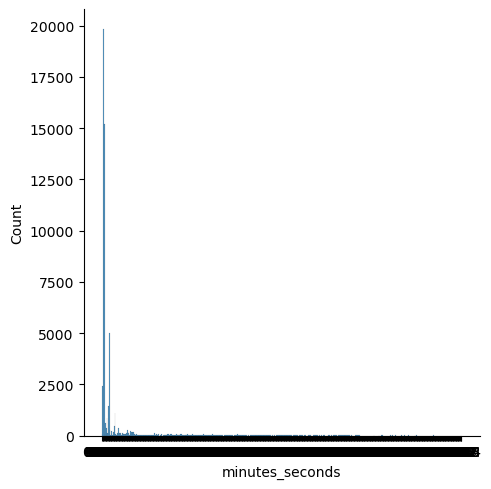

In [14]:
sns.displot(df_sub['minutes_seconds'], bins=25)

In [39]:
# Despite the extreme frequency of low-duration plays, I think I 
# need to leave this unchanged for now and can revisit after the initial regression

## Duplicates Check 

In [40]:
dups = df_sub.duplicated()

In [41]:
dups.shape # No duplicates 

(60511,)

In [42]:
df_sub[['minutes', 'seconds']] = df_sub['minutes_seconds'].str.split(':', expand=True)


In [43]:
df_sub['minutes'] = df_sub['minutes'].astype(int)
df_sub['seconds'] = df_sub['seconds'].astype(int)

In [19]:
df_sub['total_seconds'] = df_sub['minutes'] * 60 + df_sub['seconds']


## 03 Data Prep for regression analysis

In [20]:
# Create a scatterplot to plot variables against each other 

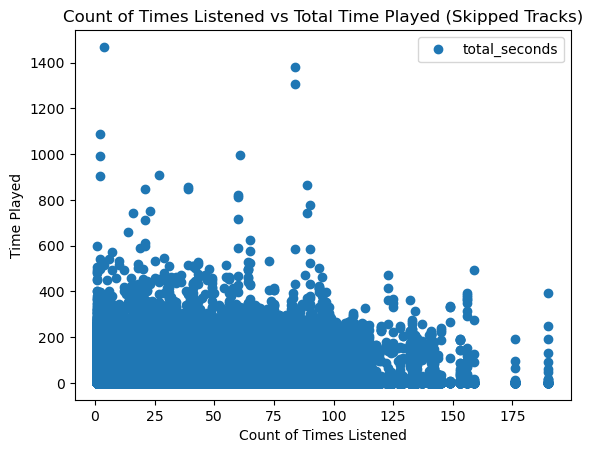

In [44]:
df_sub.plot(x = 'count_y', y = 'total_seconds', style='o')
plt.title('Count of Times Listened vs Total Time Played (Skipped Tracks)')
plt.xlabel('Count of Times Listened')
plt.ylabel('Time Played')
plt.show()

# Hypothesis: As the number of times the song is played increases, the total time played before being skipped decreases

In [47]:
# Reshape variables into Numpy arrays 
X = df_sub['count_y'].values.reshape(-1,1)
y = df_sub['total_seconds'].values.reshape(-1,1)

In [48]:
X

array([[ 1.],
       [ 5.],
       [ 1.],
       ...,
       [ 6.],
       [ 6.],
       [83.]])

In [49]:
y

array([[25],
       [ 3],
       [ 1],
       ...,
       [ 0],
       [ 1],
       [ 1]])

In [50]:
# Split data into a training set and a test set 

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state=0)

# 04 Regression Analysis 

In [51]:
# Create a regression object. 
regression = LinearRegression()

In [52]:
# Fit the regression object onto the training set 
regression.fit(X_train, y_train)

LinearRegression()

In [53]:
# Predict the values of y using X.
y_predicted = regression.predict(X_test)

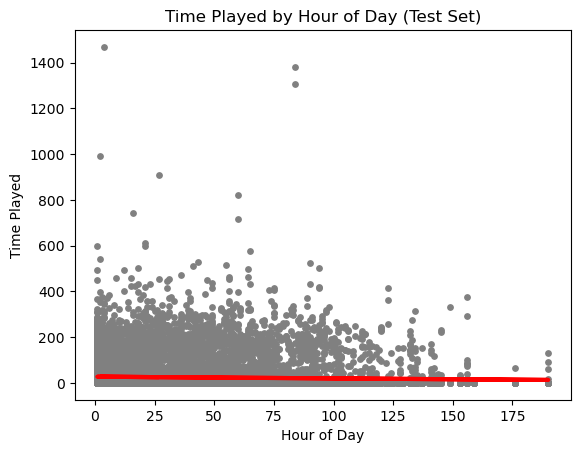

In [57]:
# Create a plot that shows the regression line from the model 

plot_test = plt
plot_test.scatter(X_test, y_test, color='gray', s=15)
plot_test.plot(X_test, y_predicted, color='red', linewidth=3)
plot_test.title('Time Played by Hour of Day (Test Set)')
plot_test.xlabel('Hour of Day')
plot_test.ylabel('Time Played')
plot_test.show()

# The line doesn't appear to fit the set very well because there are so many outliers, and most of the data is concentrated at a low duration of play time.  Because of that low-duration concentration, the line stays very flat and relatively low, not coming into contact with very many data points 

# 05 Test Set Summary Statistics

In [60]:
# Create objects that contain the model summary statistics.

rmse = mean_squared_error(y_test, y_predicted) # This is the mean squared error
r2 = r2_score(y_test, y_predicted) # This is the R2 score. 

In [61]:
print('Slope:' ,regression.coef_)
print('Mean squared error:', rmse)
print('R2 score:' , r2)

Slope: [[-0.07443248]]
Mean squared error: 4171.678894209125
R2 score: 0.0028472803863541785


In [62]:
y_predicted

array([[27.01359649],
       [21.28229523],
       [24.33402707],
       ...,
       [26.56700159],
       [22.32435001],
       [25.30164936]])

In [34]:
data = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_predicted.flatten()})
data.head(30)

,Actual,Predicted
0,2,27.013596
1,0,21.282295
2,89,24.334027
3,141,24.482892
4,1,24.334027
5,0,24.557325
6,2,26.939164
7,1,25.078352
8,0,24.482892
9,81,23.813000


## Looking at the dataframe above comparing actual values against predicted values, it's very clear that the model did not perform well.  This is due to the bias towards low-duration plays.  Perhaps removing songs with duration less than 15 seconds would allow us to look at the outlying values more clearly 

In [72]:
# Clean the extreme values from the "Price per Unit" variable observed during the consistency checks.

df_test = df_sub[df_sub['total_seconds'] >= 300] 

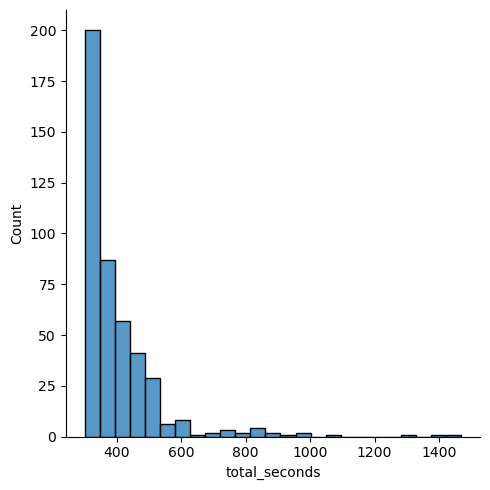

In [73]:
sns.displot(df_test['total_seconds'], bins=25)

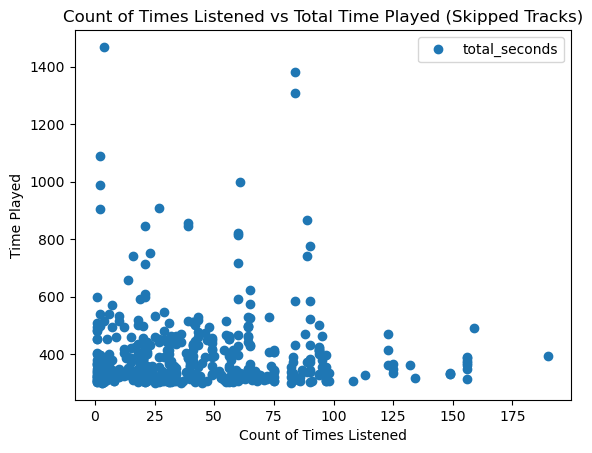

In [74]:
df_test.plot(x = 'count_y', y = 'total_seconds', style='o')
plt.title('Count of Times Listened vs Total Time Played (Skipped Tracks)')
plt.xlabel('Count of Times Listened')
plt.ylabel('Time Played')
plt.show()

In [75]:
# Reshape again.

X_2 = df_test['count_y'].values.reshape(-1,1)
y_2 = df_test['total_seconds'].values.reshape(-1,1)

In [76]:
X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(X_2, y_2, test_size=0.3, random_state=0)

In [77]:
# Run and fit the regression.

regression = LinearRegression()  
regression.fit(X_train_2, y_train_2)

LinearRegression()

In [78]:
# Predict.

y_predicted_2 = regression.predict(X_test_2)

In [79]:
rmse = mean_squared_error(y_test_2, y_predicted_2)
r2 = r2_score(y_test_2, y_predicted_2)

In [80]:
print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[-0.09911969]]
Mean squared error:  22368.86461024771
R2 score:  -0.008927627018554762


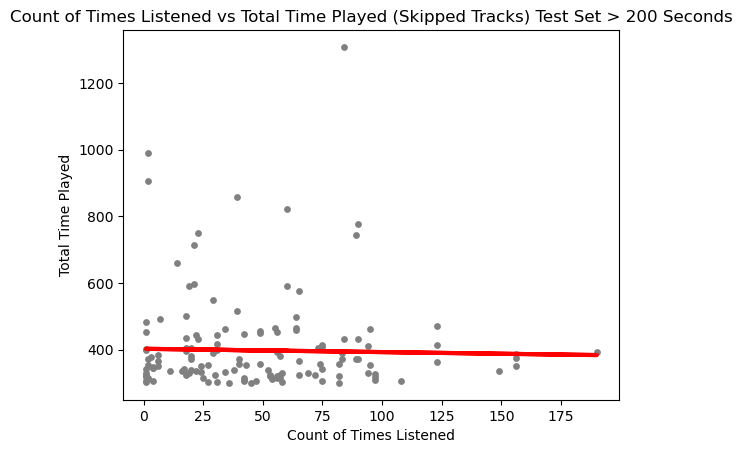

In [81]:
# Visualizing the test set results.
plot_test = plt
plot_test.scatter(X_test_2, y_test_2, color='gray', s = 15)
plot_test.plot(X_test_2, y_predicted_2, color='red', linewidth =3)
plot_test.title('Count of Times Listened vs Total Time Played (Skipped Tracks) Test Set > 200 Seconds')
plot_test.xlabel('Count of Times Listened')
plot_test.ylabel('Total Time Played')
plot_test.show()

# Removing the bias toward lower listening duration actually made the model worse, with a negative R2 value, meaning that this line fits worse than a horizontal line.  